## EDA on Synthea 1k Dataset

[Data download link](https://synthea.mitre.org/downloads)

[CSV file](https://storage.googleapis.com/synthea-public/synthea_sample_data_csv_jan2020.zip)

In [231]:
import pandas as pd
from pathlib import os
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import re
import numpy as np

%matplotlib inline

In [19]:
path = "../data/synthea_sample_data_csv_jan2020/csv"
files = {i.split(".")[0]:os.path.join(path, i) for i in os.listdir(path)}

In [20]:
files

{'organizations': '../data/synthea_sample_data_csv_jan2020/csv/organizations.csv',
 'conditions': '../data/synthea_sample_data_csv_jan2020/csv/conditions.csv',
 'patients': '../data/synthea_sample_data_csv_jan2020/csv/patients.csv',
 'payers': '../data/synthea_sample_data_csv_jan2020/csv/payers.csv',
 'allergies': '../data/synthea_sample_data_csv_jan2020/csv/allergies.csv',
 'medications': '../data/synthea_sample_data_csv_jan2020/csv/medications.csv',
 'careplans': '../data/synthea_sample_data_csv_jan2020/csv/careplans.csv',
 'observations': '../data/synthea_sample_data_csv_jan2020/csv/observations.csv',
 'providers': '../data/synthea_sample_data_csv_jan2020/csv/providers.csv',
 'procedures': '../data/synthea_sample_data_csv_jan2020/csv/procedures.csv',
 'payer_transitions': '../data/synthea_sample_data_csv_jan2020/csv/payer_transitions.csv',
 'encounters': '../data/synthea_sample_data_csv_jan2020/csv/encounters.csv',
 'imaging_studies': '../data/synthea_sample_data_csv_jan2020/csv/ima

In [21]:
organizations = pd.read_csv(files["organizations"])

In [22]:
organizations.sample(5)

,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
542,abd13c9a-fc39-3fac-9de2-9cd307fe49b7,PCP107325,57 PROSPECT ST,NANTUCKET,MA,02554-2799,41.293416,-70.102169,NaN,6328.84,49
52,6f122869-a856-3d65-8db9-099bf4f5bbb8,LAHEY HOSPITAL & MEDICAL CENTER BURLINGTON,41 & 45 MALL ROAD,BURLINGTON,MA,01803,42.503227,-71.201713,7817445100,118517.21,942
423,21ed1061-d809-3fa9-a1bd-bd0b1a108a41,BAY STATE EXCELLENT VISION,600 MAIN ST,MALDEN,MA,02148-3919,42.429380,-71.058706,781-321-6463,8137.08,63
374,c687b364-0f86-39fe-9669-8a067a18528c,PCP47827,30 CONWELL ST,PROVINCETOWN,MA,02657-1548,42.056913,-70.190488,401-855-4001,8653.72,67
40,ac8356a5-78f8-3a63-8a1e-59e832fd54e7,NASHOBA VALLEY MEDICAL CENTER,200 GROTON ROAD,AYER,MA,01432,42.562221,-71.584844,9787849000,195496.57,1540


In [23]:
organization_pivot = organizations.pivot_table(values=["REVENUE", "UTILIZATION"], index=["CITY"], aggfunc="sum")

In [24]:
organization_pivot.T

CITY,ABINGTON,ACTON,ACUSHNET,ADAMS,AGAWAM,ALFORD,ALLSTON,AMESBURY,AMHERST,ANDOVER,...,WILMINGTON,WINCHENDON,WINCHESTER,WINTHROP,WOBURN,WORCESTER,WORTHINGTON,WRENTHAM,Worcester,YARMOUTH PORT
REVENUE,41589.52,4133.12,22732.16,22473.84,23119.64,11107.76,3616.48,49984.92,53472.24,32031.68,...,5941.36,1808.24,219545.97,19244.84,27252.76,1487432.02,7878.76,3874.8,1033.28,18211.56
UTILIZATION,322.00,32.00,176.00,174.00,179.00,86.00,28.00,387.00,414.00,248.00,...,110.00,14.00,1747.00,149.00,211.00,12723.00,61.00,30.0,12.00,141.00


In [25]:
conditions = pd.read_csv(files["conditions"])
conditions.sample(5)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
4091,1975-03-11,NaN,06d20b5f-ce18-4e87-8288-c9a021de7bf5,24a8d866-c6eb-406e-9277-b40599067ee4,88805009,Chronic congestive heart failure (disorder)
922,2016-03-13,2016-03-20,09113e5c-25c5-424e-9004-b67d779e8419,49518e35-efea-446f-a0d6-374c91e2d75f,444814009,Viral sinusitis (disorder)
4744,2010-12-26,2011-01-09,73c30a1e-613a-44d0-9e33-a8ef9e97109f,f7f252a6-0f31-4762-9dc7-c10501ce064d,444814009,Viral sinusitis (disorder)
242,2011-03-09,2011-03-16,f1638da4-1835-4214-b991-34ceded6a9be,a125f6e4-00c1-4026-b706-8a4c033e0b93,444814009,Viral sinusitis (disorder)
2881,2014-07-30,2014-08-13,4627f6a2-0d5d-411d-aecd-a9ba610d4167,3fdfedd9-0d1a-4da6-b3a7-61564e5cb512,72892002,Normal pregnancy


In [26]:
patients = pd.read_csv(files["patients"])
patients.sample(5)

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
112,d69b6bc1-715c-4209-893a-29ae77ef4240,2009-06-29,NaN,999-51-3090,NaN,NaN,NaN,Ollie731,Konopelski743,NaN,...,North Andover Massachusetts US,880 Koepp Club,Waltham,Massachusetts,Middlesex County,2451.0,42.387358,-71.203432,24344.43,645.80
594,26cbb672-892b-43be-b8bf-4d7c2c6c7c6e,2010-03-26,NaN,999-69-7035,NaN,NaN,NaN,Toni630,Bradtke547,NaN,...,Boxborough Massachusetts US,284 Kerluke Extension,Somerville,Massachusetts,Middlesex County,2140.0,42.413384,-71.131596,30389.46,3293.12
927,f7f23856-573f-4272-8e4c-67ba19a292c2,2008-04-11,NaN,999-65-2135,NaN,NaN,NaN,Joaquin141,Ortiz186,NaN,...,Ludlow Massachusetts US,1061 Krajcik Gateway,Lowell,Massachusetts,Middlesex County,1850.0,42.606932,-71.285645,312948.28,2583.20
837,229a97ca-19fc-4ed0-a5b2-efa7ebad5fcf,1920-01-26,1946-05-06,999-31-5839,S99913837,X23998671X,Mr.,Lionel365,McGlynn426,NaN,...,Westport Massachusetts US,596 Stroman Lodge Suite 27,Westport,Massachusetts,Bristol County,NaN,41.529934,-71.052710,681166.59,4080.44
147,35110afe-4654-41ae-887d-ac382c517f5e,1939-10-31,NaN,999-81-6033,S99927475,X29030429X,Mr.,Charles364,Dach178,NaN,...,Wellesley Massachusetts US,534 Kunde Fork,Ashland,Massachusetts,Middlesex County,NaN,42.219738,-71.426761,1768054.35,6258.68


In [27]:
allergies = pd.read_csv(files["allergies"])
allergies.sample(5)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
453,2003-04-28,NaN,56f53b58-59b7-4bb6-8171-2ec9aa9f72eb,599e70d2-5d58-486d-8680-a26333559f2a,91935009,Allergy to peanuts
253,1967-07-09,NaN,1e237ebf-7617-4727-9424-6f01347de978,ad10837e-0df8-4b75-afbe-4420499d821f,91934008,Allergy to nut
433,1955-10-25,NaN,f3e7720a-ca8e-4dce-9d9d-5fe299bad044,372d9050-a672-4e7f-b9b8-2c952c9ef28f,424213003,Allergy to bee venom
497,1989-09-08,NaN,3ac8f90e-f202-45b3-8e60-4ed5cb675594,edafa047-7baf-4e96-8712-887e64061f99,91930004,Allergy to eggs
215,1996-02-27,2012-02-22,39011e30-1fa9-48ce-868b-941eb2ebca4d,65880bd5-fc00-4448-bf32-1e7ceea4829f,232347008,Dander (animal) allergy


In [28]:
medications = pd.read_csv(files["medications"])
medications.sample(5)

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
11974,2009-01-04,2010-01-10,fa1e6bf8-62d9-4960-9201-66877f6bec17,7caa7254-5050-3b5e-9eae-bd5ea30e809c,2874759a-eb82-46f5-a34d-bd37faffa563,896209,60 ACTUAT Fluticasone propionate 0.25 MG/ACTUA...,17.20,0.00,12,206.40,87433001.0,Pulmonary emphysema (disorder)
10823,1995-06-03,1996-06-08,14753a14-04f6-4e07-b566-4c237ac4266e,6e2f1a2d-27bd-3701-8d08-dae202c58632,c0d1b592-804a-441d-a5b3-f0e5b8dbbd24,310798,Hydrochlorothiazide 25 MG Oral Tablet,263.49,188.49,12,3161.88,59621000.0,Hypertension
33786,2009-08-22,2010-08-28,25a1b307-6a47-4680-a648-f5831d309d8e,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,8460658f-5cc6-40d1-8602-dd2e9a0d130d,310798,Hydrochlorothiazide 25 MG Oral Tablet,263.49,0.00,12,3161.88,59621000.0,Hypertension
18366,2014-01-01,2014-01-15,3682ffc8-e9a1-473f-9e9e-63f317760921,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,80588dbe-70e4-428f-9938-ccfba0570110,1094107,Phenazopyridine hydrochloride 100 MG Oral Tablet,14.45,0.00,1,14.45,38822007.0,Cystitis
42314,1960-09-23,1961-09-29,ab5af4a9-18ca-476a-a9f7-d9cc169e4bc4,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,f129a7c6-56ca-4dee-8c9a-c42174eb916c,896209,60 ACTUAT Fluticasone propionate 0.25 MG/ACTUA...,42.14,0.00,12,505.68,185086009.0,Chronic obstructive bronchitis (disorder)


In [29]:
careplans = pd.read_csv(files["careplans"])
careplans.sample(5)

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
600,550e50ac-c08b-4bfe-9a87-689af5c3b38a,2018-04-11,2018-11-14,a11ae1b1-a27a-4ecf-b1ae-32b6f26b5c75,57155c78-4a60-411f-8362-784075989dcd,134435003,Routine antenatal care,72892002.0,Normal pregnancy
734,df627a0b-bc1c-4e65-8974-01fa3ebdd03b,1955-07-28,NaN,9a13e35e-fd4e-41ed-848a-bcd964d7b1c5,849738c0-028e-4124-a586-ca234b9e400c,443402002,Lifestyle education regarding hypertension,59621000.0,Hypertension
637,9f8b9e4f-49a2-4817-bd7e-57516643618c,2017-06-12,2017-06-26,8add20c8-03d0-42fc-8c44-ddd2d6c78522,f97e61dc-6357-461d-ad5a-b9f02cb60a2d,91251008,Physical therapy procedure,44465007.0,Sprain of ankle
309,37210bfc-008f-4907-a8ee-7508cbd4819e,1947-08-06,NaN,44ee3e46-ff8c-46cc-896a-8e1d20d66322,d0abe4f1-2ab0-49fd-aaae-967df66583f9,698360004,Diabetes self management plan,15777000.0,Prediabetes
3016,69a045bd-6e71-4bf3-9e6c-9a6384d8d5b1,2009-03-20,NaN,19f332df-ed6a-4ae6-9e03-f77c9dc5ad9a,72c906bc-673d-4680-abca-fb4402483c93,443402002,Lifestyle education regarding hypertension,59621000.0,Hypertension


In [30]:
observations = pd.read_csv(files["observations"])
observations.sample(5)

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
6790,2010-09-28,c075121e-fec6-4769-a7f6-b2c2c5df897a,b0222664-4eea-42fb-b70f-578cd27183f7,789-8,Erythrocytes [#/volume] in Blood by Automated ...,4.2,10*6/uL,numeric
262505,2014-02-27,d35c5e1a-094d-4795-908c-7f0db1b54753,929cfd18-6fb5-4a6e-a520-9d1298dd1984,32623-1,Platelet mean volume [Entitic volume] in Blood...,9.8,fL,numeric
146902,2016-02-23,e6149310-7b46-4bbe-8bf0-49a8acbb1193,NaN,DALY,DALY,16.3,a,numeric
74985,1981-05-05,b9f38ea3-0a63-46fd-af14-1f51e5b8c9ff,3bfd63e5-fbde-4afa-98e8-ab75168a6562,8302-2,Body Height,180.4,cm,numeric
162145,2011-05-27,7df35793-5bcd-4726-a341-a5d9f4327905,NaN,QALY,QALY,2.0,a,numeric


In [31]:
providers = pd.read_csv(files["providers"])
providers.sample(5)

,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
5320,d9e44545-3bfd-3d6d-b16e-5f357a94d1a7,9b1f70d0-e48a-3bb5-8900-6580a13d5596,Serafina151 Bailey598,F,CARDIOVASCULAR DISEASE (CARDIOLOGY),3130 STATE HWY RTE 6,WELLFLEET,MA,02667-7402,41.916805,-70.027100,0
1460,d0137ce6-be5c-32ad-b23f-272c75b88980,6aec8f74-601a-33f4-bad8-ddaf92be0fd9,Hyacinth68 Homenick806,F,PHYSICIAN ASSISTANT,40 WRIGHT ST,PALMER,MA,01069-1138,42.187794,-72.308469,0
3933,8a0ddf17-1091-3cd4-be96-728cfb1601e0,4215bb3e-96a5-326d-96c1-b54744a390fd,Cyrus914 Gutmann970,M,CERTIFIED REGISTERED NURSE ANESTHETIST,1 ESSEX CTR DR,PEABODY,MA,01960-2901,42.534279,-70.969782,0
2160,805ca4e6-8437-3cb7-a9e7-e5d8eaaa0b4a,42a836e3-7889-3d7c-b80c-98f1ecb1ae65,Bennett146 Pfannerstill264,M,CHIROPRACTIC,126 MERRIMACK ST,METHUEN,MA,01844-6109,42.742751,-71.178588,0
3380,6aa82bf0-a2c6-36fa-aca3-4a6a7c6a40bd,33e83aa0-c19d-3bed-b828-3d9ef1e8af5d,Krystin400 Runolfsdottir785,F,NURSE PRACTITIONER,10 GOVE ST,EAST BOSTON,MA,02128-1920,42.375541,-70.970646,0


In [32]:
procedures = pd.read_csv(files["procedures"])
procedures.sample(5)

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
12134,2017-11-06,1b6ab64e-58a0-459a-8acf-44f922b51fa6,efd86711-662d-4e3f-8c72-8ae9d59d1002,288086009,Suture open wound,15022.67,284549007.0,Laceration of hand
18982,1971-01-31,ebdec9ee-d45e-4868-ab28-5a498c26366f,c9d7823d-942e-4c87-8f24-f79c91892af2,430193006,Medication Reconciliation (procedure),680.80,NaN,NaN
14526,2012-01-10,31d17ddf-5f15-493a-a867-f60db5ce8f51,1259fa30-4c81-4591-8879-2f51f914d3ce,33195004,Teleradiotherapy procedure (procedure),516.65,254837009.0,Malignant neoplasm of breast (disorder)
3740,2019-09-29,99841737-7216-42c8-a348-4ff3ef2baaa6,b0b5cbeb-aca4-4400-995f-cf6400a8e4e4,10383002,Counseling for termination of pregnancy,516.65,72892002.0,Normal pregnancy
6013,2018-05-02,e0a39eee-99ae-4b58-ba2c-f33d5a9f30a7,902b9179-e58f-40f0-849a-977ca1657f6d,180325003,Electrical cardioversion,31588.77,49436004.0,Atrial Fibrillation


In [33]:
payer_transitions = pd.read_csv(files["payer_transitions"])
payer_transitions.sample(5)

,PATIENT,START_YEAR,END_YEAR,PAYER,OWNERSHIP
1217,9dd69671-d67f-4bd8-876c-ea05d57767bd,1987,1987,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,Self
2904,c12a2543-49d1-4b7e-bf0e-245222027e21,1991,1994,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Self
180,e5cc65fa-8ce6-43cf-a605-7a8dd787dc97,1992,2010,6e2f1a2d-27bd-3701-8d08-dae202c58632,Guardian
398,5e367123-2708-4c5c-8a90-8de7262890b2,2008,2008,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,Self
1536,bf7cbbdd-17ae-4fb8-903f-07cde3e10e68,1981,1999,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,Guardian


In [34]:
encounters = pd.read_csv(files["encounters"])
encounters.sample(5)

,Id,START,STOP,PATIENT,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
14934,3aaef823-49da-447c-9cbe-d8b0a774c27c,2017-08-13T09:13:05Z,2017-08-13T09:43:05Z,12e35cef-8833-4290-86f8-4049a6eaead4,f6f5b642-1bfb-3f7b-bce3-f883eb452bc3,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
588,6e6f963d-c64c-4c3e-bb60-d0ab63f5b209,1959-03-31T20:12:16Z,1959-03-31T20:27:16Z,cf91824c-e440-4e0f-a5ff-592bff72041d,12c9daf5-a29c-36c9-ac55-28972463e566,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185347001,Encounter for problem,129.16,129.16,69.16,NaN,NaN
45325,1ff7cf0f-0601-4f97-b091-615366b3b0eb,1969-06-16T21:21:10Z,1969-06-16T21:36:10Z,cc504e3c-5426-48f6-9d6c-026a192a5fcf,6fca7f82-5436-395c-b7d5-df9438fb4b2e,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,wellness,410620009,Well child visit (procedure),129.16,129.16,69.16,NaN,NaN
52430,a3c6e57a-0d56-4f7d-b33c-db6eb1042f41,1989-09-23T05:03:17Z,1989-09-23T05:33:17Z,e0c76ff4-6cf0-44cc-9a67-33bf4b9403b4,6cea8def-fb8c-3d56-9471-94669dbfb3e2,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,NaN
56399,0498298f-330a-4846-a8dc-e274ffb40051,2013-11-30T05:51:44Z,2013-11-30T08:06:44Z,839b60c8-6d6d-471b-aefd-807173017b0d,fd328395-ab1d-35c6-a2d0-d05a9a79cf11,7caa7254-5050-3b5e-9eae-bd5ea30e809c,ambulatory,185347001,Encounter for problem (procedure),129.16,129.16,89.16,NaN,NaN


In [35]:
imaging_studies = pd.read_csv(files["imaging_studies"])
imaging_studies.sample(5)

,Id,DATE,PATIENT,ENCOUNTER,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,SOP_CODE,SOP_DESCRIPTION
100,a24e539d-b520-4919-87ed-70160d62ac34,2019-08-29,b9f74f4c-e740-4e74-8963-5c5114ee84fe,bf242dba-6f72-45fb-8207-3973f37b8236,72696002,Knee,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
340,cd7cdc6b-a1be-4e6f-8fd5-2a1a3413f785,1927-04-11,e3bb2db0-3182-4780-9533-f781ed239f2e,9f354f14-f659-4dfd-9d4d-e567834fd832,344001,Ankle,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
263,959f6bbe-4d3d-43d3-bb8f-dbf142bf95a3,2011-06-18,5f174d30-a1c8-462b-83a2-3d894727f028,8aebca07-3aa9-46d3-be34-e69b21a1ba99,40983000,Arm,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
575,0ce1f738-5a97-47a6-8575-88de7bee2579,2012-12-23,6a021f79-420e-4b48-ae50-a4908ab89af5,bd8857c3-1cb0-45e3-b99c-226dd55b0f6f,72696002,Knee,DX,Digital Radiography,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage
201,933471b6-1b5f-454c-a227-6c9e32eef555,1983-01-15,7d57360a-e442-42b0-b36f-b17dc76476e7,43ef9716-1b7e-4a73-89d3-b5abb898d729,51185008,Thoracic structure (body structure),CT,Computed Tomography,1.2.840.10008.5.1.4.1.1.2,CT Image Storage


In [36]:
immunizations = pd.read_csv(files["immunizations"])
immunizations.sample(5)

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
8129,2013-02-14,5e54c547-21ca-4755-b91f-c27b9992e523,286a9480-e012-424a-861e-96c235069d40,140,Influenza seasonal injectable preservative ...,140.52
12499,2015-05-13,8138d48e-efbc-4b38-827b-6c1097826e0d,578103cd-d39d-438e-bc46-83cc78311097,140,Influenza seasonal injectable preservative ...,140.52
12950,2017-06-25,c4bb5acf-fb71-4277-b90a-93e1505b6366,35ab5798-fc48-4db7-8e63-268005a39ec3,140,Influenza seasonal injectable preservative ...,140.52
339,2010-07-06,62c5f753-741c-4a2c-a0ca-8b8d3bf40ea7,2acfd5e4-7533-4ba1-91b1-67d94a4a87e9,140,Influenza seasonal injectable preservative ...,140.52
12476,2015-05-14,743c97dc-4b5a-4f76-8a58-8b3b1e9834bd,1d72b420-a9ce-4de5-922f-584a1c3f5824,20,DTaP,140.52


In [37]:
patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [131]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1173 non-null   object 
 1   BIRTHDATE            1173 non-null   object 
 2   DEATHDATE            173 non-null    object 
 3   SSN                  1173 non-null   object 
 4   DRIVERS              967 non-null    object 
 5   PASSPORT             907 non-null    object 
 6   PREFIX               937 non-null    object 
 7   FIRST                1173 non-null   object 
 8   LAST                 1173 non-null   object 
 9   SUFFIX               16 non-null     object 
 10  MAIDEN               317 non-null    object 
 11  MARITAL              798 non-null    object 
 12  RACE                 1173 non-null   object 
 13  ETHNICITY            1173 non-null   object 
 14  GENDER               1173 non-null   object 
 15  BIRTHPLACE           1173 non-null   o

## Join Patient : Conditions : Encounters : Allergies

In [22]:
conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2011-06-03,2011-06-17,e2d11cbc-f6d5-499b-a964-8e01947a1f83,89f0f845-9742-44eb-8fd8-05bfeef734a9,444814009,Viral sinusitis (disorder)
1,2012-08-16,2012-08-30,e2d11cbc-f6d5-499b-a964-8e01947a1f83,9d5107b7-41a0-447d-b90f-62851615fa88,444814009,Viral sinusitis (disorder)
2,2010-09-11,2011-01-22,28887562-4e6c-4f62-b2f3-cc953ddff93c,7605e0f3-260f-440e-8476-b4bcdbeab0a2,36971009,Sinusitis (disorder)
3,2010-11-06,NaN,28887562-4e6c-4f62-b2f3-cc953ddff93c,04dd76bb-e6c2-4650-8aad-78e219132572,40055000,Chronic sinusitis (disorder)
4,2011-12-27,2012-01-17,28887562-4e6c-4f62-b2f3-cc953ddff93c,f83de967-1095-45ef-9fb1-373e287f21a2,444814009,Viral sinusitis (disorder)


In [25]:
patient_conditions = pd.merge(patients, conditions, left_on="Id", right_on="PATIENT")

In [31]:
patient_conditions_encounters = pd.merge(patient_conditions, encounters, left_on="Id", right_on="PATIENT")

In [33]:
patient_conditions_encounters.head()

,Id_x,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,PROVIDER,PAYER,ENCOUNTERCLASS,CODE_y,DESCRIPTION_y,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,e2d11cbc-f6d5-499b-a964-8e01947a1f83,1983-08-10,NaN,999-83-6585,S99949352,X86223440X,Mr.,Abraham100,Jacobs452,NaN,...,d692e283-0833-3201-8e55-4f868a9c0736,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,185345009,Encounter for symptom,129.16,129.16,69.16,444814009.0,Viral sinusitis (disorder)
1,e2d11cbc-f6d5-499b-a964-8e01947a1f83,1983-08-10,NaN,999-83-6585,S99949352,X86223440X,Mr.,Abraham100,Jacobs452,NaN,...,4fef7da2-d425-37a0-a7fc-4ed10f6afc68,047f6ec3-6215-35eb-9608-f9dda363a44c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
2,e2d11cbc-f6d5-499b-a964-8e01947a1f83,1983-08-10,NaN,999-83-6585,S99949352,X86223440X,Mr.,Abraham100,Jacobs452,NaN,...,d692e283-0833-3201-8e55-4f868a9c0736,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,185345009,Encounter for symptom,129.16,129.16,69.16,444814009.0,Viral sinusitis (disorder)
3,e2d11cbc-f6d5-499b-a964-8e01947a1f83,1983-08-10,NaN,999-83-6585,S99949352,X86223440X,Mr.,Abraham100,Jacobs452,NaN,...,4fef7da2-d425-37a0-a7fc-4ed10f6afc68,047f6ec3-6215-35eb-9608-f9dda363a44c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN
4,e2d11cbc-f6d5-499b-a964-8e01947a1f83,1983-08-10,NaN,999-83-6585,S99949352,X86223440X,Mr.,Abraham100,Jacobs452,NaN,...,4fef7da2-d425-37a0-a7fc-4ed10f6afc68,047f6ec3-6215-35eb-9608-f9dda363a44c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN


In [36]:
patient_conditions_encounters_alergies = pd.merge(patient_conditions_encounters, allergies, left_on="Id_x", right_on="PATIENT")

In [42]:
patient_conditions_encounters_alergies.columns

Index(['Id_x', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'START_x', 'STOP_x', 'PATIENT_x', 'ENCOUNTER_x',
       'CODE_x', 'DESCRIPTION_x', 'Id_y', 'START_y', 'STOP_y', 'PATIENT_y',
       'PROVIDER', 'PAYER', 'ENCOUNTERCLASS', 'CODE_y', 'DESCRIPTION_y',
       'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE',
       'REASONCODE', 'REASONDESCRIPTION', 'START', 'STOP', 'PATIENT',
       'ENCOUNTER_y', 'CODE', 'DESCRIPTION'],
      dtype='object')

In [47]:
pat_con_enc_ale = patient_conditions_encounters_alergies.drop(["SSN", "DRIVERS", "PASSPORT", "ADDRESS"], axis=1)

In [48]:
pat_con_enc_ale.columns

Index(['Id_x', 'BIRTHDATE', 'DEATHDATE', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX',
       'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE',
       'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'START_x', 'STOP_x', 'PATIENT_x', 'ENCOUNTER_x',
       'CODE_x', 'DESCRIPTION_x', 'Id_y', 'START_y', 'STOP_y', 'PATIENT_y',
       'PROVIDER', 'PAYER', 'ENCOUNTERCLASS', 'CODE_y', 'DESCRIPTION_y',
       'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE',
       'REASONCODE', 'REASONDESCRIPTION', 'START', 'STOP', 'PATIENT',
       'ENCOUNTER_y', 'CODE', 'DESCRIPTION'],
      dtype='object')

In [52]:
pat_con_enc_ale.pivot_table(values=[ 'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE'], index=["GENDER"], aggfunc="sum")

,BASE_ENCOUNTER_COST,PAYER_COVERAGE,TOTAL_CLAIM_COST
GENDER,,,
F,1.839334e+07,8.396638e+06,1.839334e+07
M,9.407187e+06,4.781792e+06,9.407187e+06


In [65]:
pat_con_enc_ale.iloc[:, [2,42]].fillna("nan", inplace=True)

/home/midas-tech/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [74]:
pat_con_enc_ale.iloc[:,[2,42]].columns.values

array(['DEATHDATE', 'STOP'], dtype=object)

In [77]:
pat_con_enc_ale.to_csv("../data/patient_conditions_encounter_allergies.csv", index=False)

In [79]:
pd.read_csv("../data/patient_conditions_encounter_allergies.csv", low_memory=False)

,Id_x,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,...,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,START,STOP,PATIENT,ENCOUNTER_y,CODE,DESCRIPTION
0,f71f44d8-9405-45bb-8042-4d51a13d8e12,1996-07-14,NaN,Mr.,Jewel43,Schultz619,NaN,NaN,NaN,white,...,129.16,0.00,NaN,NaN,1997-04-26,NaN,f71f44d8-9405-45bb-8042-4d51a13d8e12,45fba223-0de0-4730-8d32-cec38af4f6f2,424213003,Allergy to bee venom
1,f71f44d8-9405-45bb-8042-4d51a13d8e12,1996-07-14,NaN,Mr.,Jewel43,Schultz619,NaN,NaN,NaN,white,...,129.16,0.00,NaN,NaN,1997-04-26,NaN,f71f44d8-9405-45bb-8042-4d51a13d8e12,45fba223-0de0-4730-8d32-cec38af4f6f2,419474003,Allergy to mould
2,f71f44d8-9405-45bb-8042-4d51a13d8e12,1996-07-14,NaN,Mr.,Jewel43,Schultz619,NaN,NaN,NaN,white,...,129.16,0.00,NaN,NaN,1997-04-26,NaN,f71f44d8-9405-45bb-8042-4d51a13d8e12,45fba223-0de0-4730-8d32-cec38af4f6f2,232350006,House dust mite allergy
3,f71f44d8-9405-45bb-8042-4d51a13d8e12,1996-07-14,NaN,Mr.,Jewel43,Schultz619,NaN,NaN,NaN,white,...,129.16,0.00,NaN,NaN,1997-04-26,NaN,f71f44d8-9405-45bb-8042-4d51a13d8e12,45fba223-0de0-4730-8d32-cec38af4f6f2,232347008,Dander (animal) allergy
4,f71f44d8-9405-45bb-8042-4d51a13d8e12,1996-07-14,NaN,Mr.,Jewel43,Schultz619,NaN,NaN,NaN,white,...,129.16,0.00,NaN,NaN,1997-04-26,NaN,f71f44d8-9405-45bb-8042-4d51a13d8e12,45fba223-0de0-4730-8d32-cec38af4f6f2,418689008,Allergy to grass pollen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217237,98b9d72f-cace-46ed-a6b1-079ea176f787,1986-10-24,NaN,Mrs.,Gloria696,Bayer639,NaN,D'Amore443,M,white,...,129.16,69.16,35999006.0,Blighted ovum,1987-12-01,NaN,98b9d72f-cace-46ed-a6b1-079ea176f787,31b97f92-d690-4a8e-a451-6350734503c8,714035009,Allergy to soya
217238,98b9d72f-cace-46ed-a6b1-079ea176f787,1986-10-24,NaN,Mrs.,Gloria696,Bayer639,NaN,D'Amore443,M,white,...,129.16,129.16,NaN,NaN,1987-12-01,NaN,98b9d72f-cace-46ed-a6b1-079ea176f787,31b97f92-d690-4a8e-a451-6350734503c8,714035009,Allergy to soya
217239,98b9d72f-cace-46ed-a6b1-079ea176f787,1986-10-24,NaN,Mrs.,Gloria696,Bayer639,NaN,D'Amore443,M,white,...,129.16,69.16,271737000.0,Anemia (disorder),1987-12-01,NaN,98b9d72f-cace-46ed-a6b1-079ea176f787,31b97f92-d690-4a8e-a451-6350734503c8,714035009,Allergy to soya
217240,98b9d72f-cace-46ed-a6b1-079ea176f787,1986-10-24,NaN,Mrs.,Gloria696,Bayer639,NaN,D'Amore443,M,white,...,129.16,69.16,NaN,NaN,1987-12-01,NaN,98b9d72f-cace-46ed-a6b1-079ea176f787,31b97f92-d690-4a8e-a451-6350734503c8,714035009,Allergy to soya


In [57]:
pat_con_enc_ale.columns

Index(['Id_x', 'BIRTHDATE', 'DEATHDATE', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX',
       'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE',
       'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'START_x', 'STOP_x', 'PATIENT_x', 'ENCOUNTER_x',
       'CODE_x', 'DESCRIPTION_x', 'Id_y', 'START_y', 'STOP_y', 'PATIENT_y',
       'PROVIDER', 'PAYER', 'ENCOUNTERCLASS', 'CODE_y', 'DESCRIPTION_y',
       'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE',
       'REASONCODE', 'REASONDESCRIPTION', 'START', 'STOP', 'PATIENT',
       'ENCOUNTER_y', 'CODE', 'DESCRIPTION'],
      dtype='object')

### Remove IDs and unused column

In [110]:
columns = ["PREFIX", "FIRST", "LAST", "SUFFIX", "MAIDEN", "ENCOUNTER_x", "ENCOUNTER_y", "Id_y", "PATIENT", "PATIENT_x", "PATIENT_y","CODE_x", "CODE_y", "CODE", "REASONCODE"]

In [111]:
pcad = pat_con_enc_ale.drop(columns=columns, axis=1).copy()

In [112]:
pcad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217242 entries, 0 to 217241
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_x                 217242 non-null  object 
 1   BIRTHDATE            217242 non-null  object 
 2   DEATHDATE            28534 non-null   object 
 3   MARITAL              122602 non-null  object 
 4   RACE                 217242 non-null  object 
 5   ETHNICITY            217242 non-null  object 
 6   GENDER               217242 non-null  object 
 7   BIRTHPLACE           217242 non-null  object 
 8   CITY                 217242 non-null  object 
 9   STATE                217242 non-null  object 
 10  COUNTY               217242 non-null  object 
 11  ZIP                  113240 non-null  float64
 12  LAT                  217242 non-null  float64
 13  LON                  217242 non-null  float64
 14  HEALTHCARE_EXPENSES  217242 non-null  float64
 15  HEALTHCARE_COVERA

In [129]:
pcad.query("DESCRIPTION_x != DESCRIPTION_y")[["DESCRIPTION_x","DESCRIPTION_y"]]

,DESCRIPTION_x,DESCRIPTION_y
0,Atopic dermatitis,Encounter for problem
1,Atopic dermatitis,Encounter for problem
2,Atopic dermatitis,Encounter for problem
3,Atopic dermatitis,Encounter for problem
4,Atopic dermatitis,Encounter for problem
...,...,...
217237,Anemia (disorder),Prenatal visit
217238,Anemia (disorder),General examination of patient (procedure)
217239,Anemia (disorder),Encounter for problem
217240,Anemia (disorder),Consultation for treatment


### Questions

1. Drill down to a specific illness/disease
1. Medical Conditions YoY
1. State | City vs HEALTHCARE_EXPENSES & HEALTHCARE_COVERAGE
1. State | City vs PAYER_COVERAGE 

In [101]:
profile = ProfileReport(pcad, minimal=True)

In [102]:
profile.to_notebook_iframe()

/home/midas-tech/miniconda3/envs/kossine/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning:

Consider using IPython.display.IFrame instead



In [132]:
conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2011-06-03,2011-06-17,e2d11cbc-f6d5-499b-a964-8e01947a1f83,89f0f845-9742-44eb-8fd8-05bfeef734a9,444814009,Viral sinusitis (disorder)
1,2012-08-16,2012-08-30,e2d11cbc-f6d5-499b-a964-8e01947a1f83,9d5107b7-41a0-447d-b90f-62851615fa88,444814009,Viral sinusitis (disorder)
2,2010-09-11,2011-01-22,28887562-4e6c-4f62-b2f3-cc953ddff93c,7605e0f3-260f-440e-8476-b4bcdbeab0a2,36971009,Sinusitis (disorder)
3,2010-11-06,NaN,28887562-4e6c-4f62-b2f3-cc953ddff93c,04dd76bb-e6c2-4650-8aad-78e219132572,40055000,Chronic sinusitis (disorder)
4,2011-12-27,2012-01-17,28887562-4e6c-4f62-b2f3-cc953ddff93c,f83de967-1095-45ef-9fb1-373e287f21a2,444814009,Viral sinusitis (disorder)


In [170]:
conditions["desc_lower_tokens"] = conditions["DESCRIPTION"].str.lower().apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]","",str(x)))

In [171]:
conditions

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,desc_lower_tokens
0,2011-06-03,2011-06-17,e2d11cbc-f6d5-499b-a964-8e01947a1f83,89f0f845-9742-44eb-8fd8-05bfeef734a9,444814009,Viral sinusitis (disorder),viral sinusitis disorder
1,2012-08-16,2012-08-30,e2d11cbc-f6d5-499b-a964-8e01947a1f83,9d5107b7-41a0-447d-b90f-62851615fa88,444814009,Viral sinusitis (disorder),viral sinusitis disorder
2,2010-09-11,2011-01-22,28887562-4e6c-4f62-b2f3-cc953ddff93c,7605e0f3-260f-440e-8476-b4bcdbeab0a2,36971009,Sinusitis (disorder),sinusitis disorder
3,2010-11-06,NaN,28887562-4e6c-4f62-b2f3-cc953ddff93c,04dd76bb-e6c2-4650-8aad-78e219132572,40055000,Chronic sinusitis (disorder),chronic sinusitis disorder
4,2011-12-27,2012-01-17,28887562-4e6c-4f62-b2f3-cc953ddff93c,f83de967-1095-45ef-9fb1-373e287f21a2,444814009,Viral sinusitis (disorder),viral sinusitis disorder
...,...,...,...,...,...,...,...
8281,1990-03-09,NaN,aff76ae2-eba3-40a4-a833-d06c415db326,b5ab3ded-e0f5-451b-bb75-801af3efa5f9,64859006,Osteoporosis (disorder),osteoporosis disorder
8282,1992-03-07,NaN,aff76ae2-eba3-40a4-a833-d06c415db326,31efa9dc-7c25-4fa7-aa0f-fec67abf4c40,55680006,Drug overdose,drug overdose
8283,1995-04-07,NaN,aff76ae2-eba3-40a4-a833-d06c415db326,08e2a13c-1fb8-461c-bd5b-c313851c2228,53741008,Coronary Heart Disease,coronary heart disease
8284,2011-06-01,2011-06-15,aff76ae2-eba3-40a4-a833-d06c415db326,729ff97d-7a8a-455a-9f94-b5c94681d771,444814009,Viral sinusitis (disorder),viral sinusitis disorder


In [182]:
conditions["START"] = pd.to_datetime(conditions["START"])
conditions["STOP"] = pd.to_datetime(conditions["STOP"])

In [187]:
sin_cond_df = conditions[conditions["desc_lower_tokens"].str.contains("sinusitis")]

In [191]:
sin_cond_df["DURATION"] = sin_cond_df["STOP"] - sin_cond_df["START"]

/home/midas-tech/miniconda3/envs/kossine/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
sin_cond_df["DURATION"].describe()

count                        1344
mean      36 days 19:39:38.571428
std      444 days 21:57:46.144346
min               7 days 00:00:00
25%               7 days 00:00:00
50%              14 days 00:00:00
75%              21 days 00:00:00
max           13949 days 00:00:00
Name: DURATION, dtype: object

In [200]:
sin_cond_df["DURATION"].max()

Timedelta('13949 days 00:00:00')

In [218]:
sin_cond_df.DURATION.+

0       14 days
1       14 days
2      133 days
3           NaT
4       21 days
         ...   
8240    21 days
8250    14 days
8270     7 days
8284    14 days
8285    21 days
Name: DURATION, Length: 1595, dtype: timedelta64[ns]

In [240]:
sin_cond_df.sort_values("START").set_index("START")["DURATION"]

START
1918-12-17      NaT
1927-02-15      NaT
1928-07-16      NaT
1929-11-25      NaT
1929-12-02      NaT
              ...  
2020-01-07   7 days
2020-01-10   7 days
2020-01-11   7 days
2020-01-17      NaT
2020-01-19      NaT
Name: DURATION, Length: 1595, dtype: timedelta64[ns]

In [241]:
sin_cond_df["DAYS"]= sin_cond_df["DURATION"].apply(lambda x: x.days)

/home/midas-tech/miniconda3/envs/kossine/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [246]:
sin_cond_df["DAYS"]

0        14.0
1        14.0
2       133.0
3         NaN
4        21.0
        ...  
8240     21.0
8250     14.0
8270      7.0
8284     14.0
8285     21.0
Name: DAYS, Length: 1595, dtype: float64

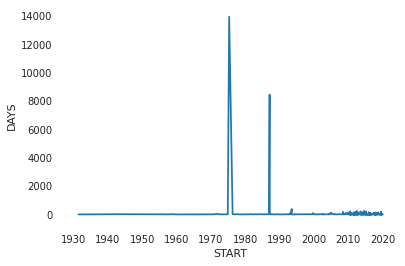

In [244]:
sns.lineplot(x="START", y="DAYS",
             data=sin_cond_df)

$$ Outlier Removal: | \frac{x - \bar{x}}{s < 3} | $$ 

In [255]:
df = sin_cond_df[sin_cond_df["DAYS"].apply(lambda x: np.abs(x - sin_cond_df["DAYS"].mean()) / sin_cond_df["DAYS"].std() < 3)]

In [284]:
df["YEAR"] = df["START"].apply(lambda x: x.year)

/home/midas-tech/miniconda3/envs/kossine/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



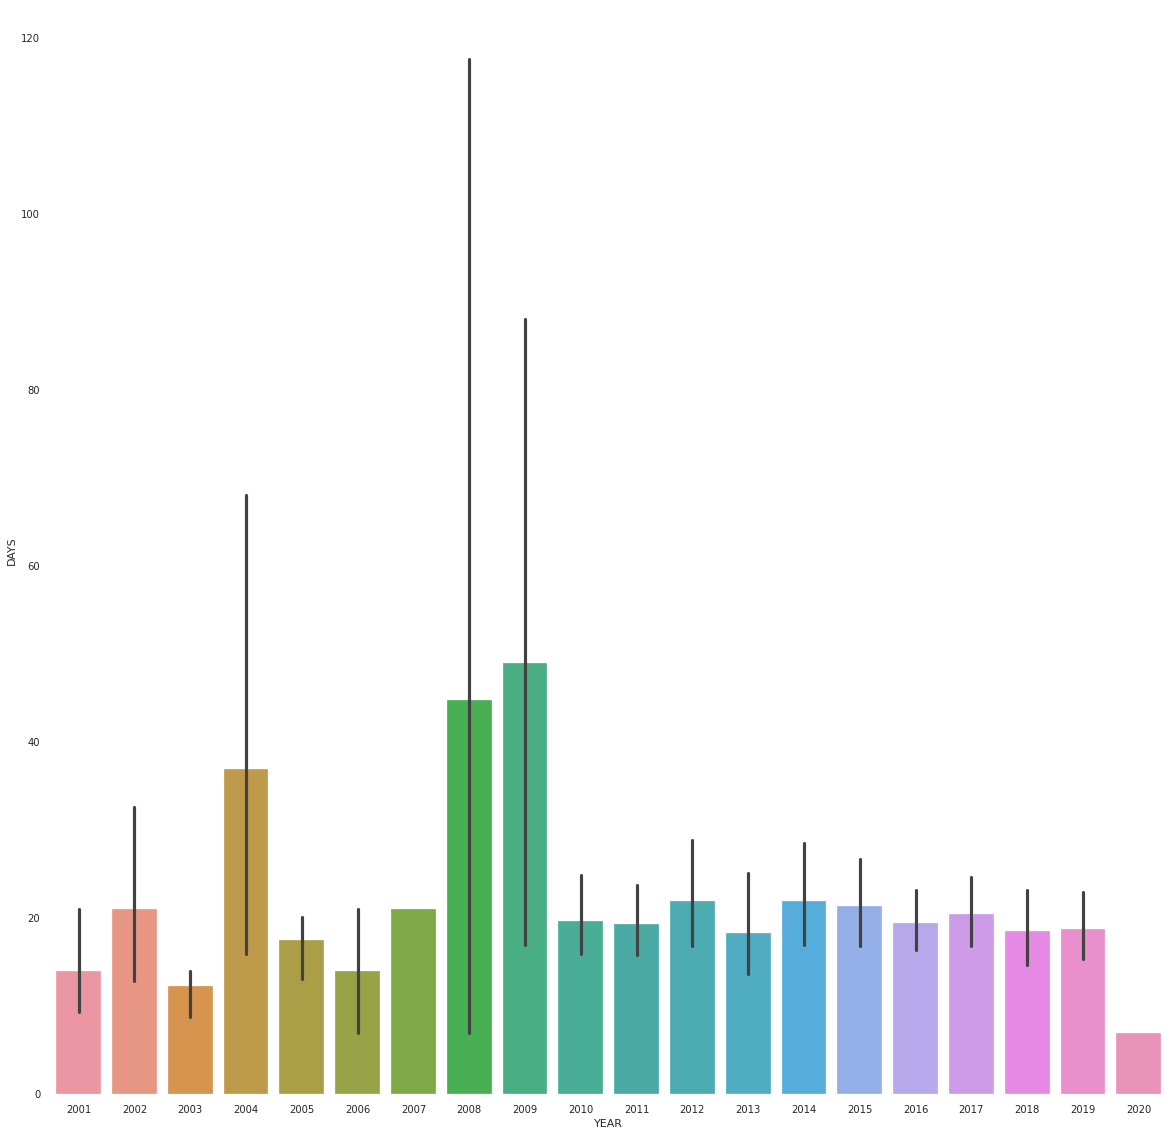

In [285]:
plt.figure(figsize=(20,20))
sns.barplot(x="YEAR", y="DAYS", data=df.query("YEAR > 2000"))